# Back propagation for 2-input 1 output X-NoR gate


In [1]:
#Loading required packages :
import numpy as np
import matplotlib.pyplot as plt

### Training dataset for XNOR (2 input) :

In [2]:
#training data set for XNOR
x_train = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y_train = np.array([1,0,0,1])
print(x_train[:,:])

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


### Generating Testing data:

In [3]:
a=np.linspace(-0.2,0.2,5)        #points nearer to zero -0.1 to 0.1
b=np.linspace(0.8,1.2,5)        #points nearer to one  -1.1 to 1.1
c = np.hstack((a,b)) 
x_test = []
y_test= []

for i in c:                   #creating combination of points with three input
    for j in c:
        x_test.append([i,j])
        tmp = np.round(x_test[-1])
        if tmp[0]==tmp[1] :
            y_test.append(1)
        else:
            y_test.append(0)
            
                
            
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape,y_test.shape)
print("Display top 10 testing inputs ",x_test[:10,:],"\ny=",y_test[:10])   

(100, 2) (100,)
Display top 10 testing inputs  [[-0.2 -0.2]
 [-0.2 -0.1]
 [-0.2  0. ]
 [-0.2  0.1]
 [-0.2  0.2]
 [-0.2  0.8]
 [-0.2  0.9]
 [-0.2  1. ]
 [-0.2  1.1]
 [-0.2  1.2]] 
y= [1 1 1 1 1 0 0 0 0 0]


### Defining Sigmoid :
\begin{equation}
    y = \frac{1}{1+ e^{-x}}
\end{equation}

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Initializing weights and theta for neural network

wij is weight from node i to j. \
tk  is theta at node k.

In [5]:
w13,w14,w23,w24,w35,w45 = 0.5,0.9,0.4,1.0,-1.2,1.1
t3,t4,t5=0.8,-0.1,0.3

w = [w13,w14,w23,w24,w35,w45]
t = [t3,t4,t5]

### calculating output at each node (like feed forward)

y3 = sigmoid($x_1w_{13} + x_2w_{23}-t_3$) \
y4 = sigmoid($x_1w_{14} + x_2w_{24}-t_4$) \
y5 = sigmoid($y_3w_{35} + y_4w_{45}-t_5$)


In [6]:
def outputs(x,w,t):
    x1 = x[0]
    x2 = x[1]
    w13,w14,w23,w24,w35,w45 = w[0],w[1],w[2],w[3],w[4],w[5]
    t3,t4,t5=t[0],t[1],t[2]
    y3 = sigmoid((x1*w13 + x2*w23 - t3))
    y4 = sigmoid((x1*w14 + x2*w24 - t4))
    y5 = sigmoid((y3*w35 + y4*w45 - t5))
    return y3,y4,y5

print("y3,y4,y5 -->",outputs(x_train[3],w,t))


y3,y4,y5 --> (0.5249791874789399, 0.8807970779778823, 0.5097242138886783)


### Defining function to calculate Accuracy :

In [7]:
def accuracy(x_test,y_test,w,t):
    count =0
    m,n = x_test.shape
    for i in range(m):
        y3,y4,y5 = outputs(x_test[i],w,t)
        y5 = np.round(y5)
        predict = y5
        if predict==y_test[i]:        #counting if correct prediction
            count +=1
    
    return (count*100)/m

## Algorithm :
\begin{equation}
e = y_{train} - y_5 \\ 
\delta_5 = y_5(1-y_5)e \\
\end{equation}
\begin{equation}
\Delta w_{35} = \alpha . y_3 . \delta_5 \\
\Delta w_{45} = \alpha . y_4 . \delta_5 \\
\end{equation}
\begin{equation}
\Delta \theta_5 = \alpha .(-1). \delta_5 \\
\delta_3 = y_3.(1-y_3).\delta_5. w_{35} \\
\delta_4 = y_4.(1-y_4).\delta_5. w_{45} \\
\end{equation}
\begin{equation}
\Delta w_{13} = \alpha . x_1 . \delta_3 \\
\Delta w_{23} = \alpha . x_2 . \delta_3 \\
\Delta \theta_3 = \alpha .(-1). \delta_3 \\
\Delta w_{14} = \alpha . x_1 . \delta_4 \\
\Delta w_{24} = \alpha . x_2 . \delta_4 \\
\Delta \theta_4 = \alpha .(-1). \delta_4 \\
\end{equation}

\begin{equation}
w_{13} = w_{13} + \Delta w_{13} \\
w_{14} = w_{14} + \Delta w_{14} \\
w_{23} = w_{23} + \Delta w_{23} \\
w_{24} = w_{24} + \Delta w_{24} \\
w_{35} = w_{35} + \Delta w_{35} \\
w_{45} = w_{45} + \Delta w_{45} 
\end{equation}

\begin{equation}
\theta_3 = \theta_3 + \Delta \theta_3 \\
\theta_4 = \theta_4 + \Delta \theta_4 \\
\theta_5 = \theta_5 + \Delta \theta_5
\end{equation}

In [8]:
#implementing algorithm from above set of equations
def backPropagationAlgorithm(x_train,y_train,w,t,alpha=0.1,max_epoch=10):
    w13,w14,w23,w24,w35,w45 = w[0],w[1],w[2],w[3],w[4],w[5]
    t3,t4,t5=t[0],t[1],t[2]
    y3,y4,y5=0,0,0
    loss = []
    acc =  []
    for epoch in range(max_epoch):
        for i in range(x_train.shape[0]):
            x1=x_train[i][0]
            x2=x_train[i][1]
            y3,y4,y5 = outputs(x_train[i],w,t)
            
            e =  (y_train[i]-y5)
            d5 = y5*(1-y5)*e
            
            dw35 = alpha*y3*d5
            dw45 = alpha*y4*d5
            dt5 = alpha*(-1)*d5
            
            d3 = y3*(1-y3)*d5*w35
            d4 = y4*(1-y4)*d5*w45
            
            dw13 = alpha*x1*d3
            dw23 = alpha*x2*d3
            dt3 = alpha*(-1)*d3
            dw14 = alpha*x1*d4
            dw24 = alpha*x2*d4
            dt4 = alpha*(-1)*d4
            
            w13 = w13 + dw13
            w14 = w14 + dw14
            w23 = w23 + dw23
            w24 = w24 + dw24
            w35 = w35 + dw35
            w45 = w45 + dw45
            t3  = t3  + dt3
            t4  = t4  + dt4
            t5  = t5  + dt5
            
            w = [w13,w14,w23,w24,w35,w45]  
            t = [t3,t4,t5]
        loss.append(e)
        acc.append(accuracy(x_test,y_test,w,t))
    return w,t,loss,acc

### Executing backPropagation Algorithm ,Calculating Accuracy for testing data.

In [9]:
w_new,t_new,loss,acc=backPropagationAlgorithm(x_train,y_train,w,t,alpha=0.1,max_epoch=15000)
print("final Weight ->",np.round(w_new,4))
print("final theta  ->",t_new)


print("\n\n\nTraining set ->")
for i in range(x_train.shape[0]):
    y3,y4,yp = outputs(x_train[i],w_new,t_new)
    print("x ->",x_train[i]," True -->",y_train[i],"   Predicted ->",np.round(yp))
    
print("Accuracy ->",accuracy(x_test,y_test,w_new,t_new)) #te

final Weight -> [ 5.5461  4.8941 -5.375  -4.5616 -7.2034  6.875 ]
final theta  -> [3.2082443736870894, -2.2124715088257707, 3.1695066786443684]



Training set ->
x -> [0 0]  True --> 1    Predicted -> 1.0
x -> [0 1]  True --> 0    Predicted -> 0.0
x -> [1 0]  True --> 0    Predicted -> 0.0
x -> [1 1]  True --> 1    Predicted -> 1.0
Accuracy -> 100.0


### Plotting Loss vs epoch

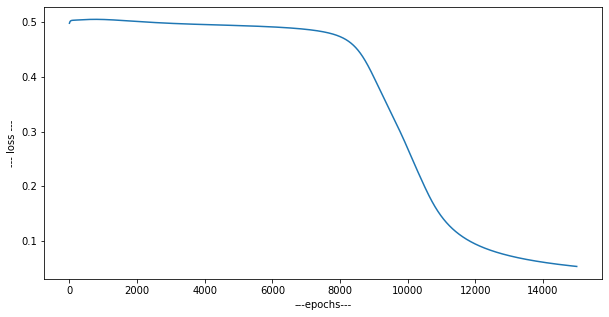

In [10]:
f = plt.figure()
f.set_figwidth(10) 
f.set_figheight(5)

plt.plot()
plt.xlabel("---epochs---")
plt.ylabel("--- loss ---")
plt.plot(loss)

### Plotting Accuracy vs epoch

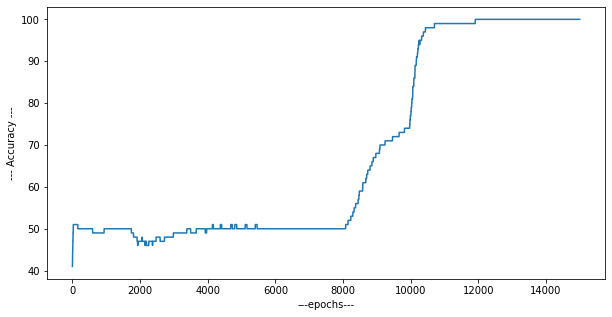

In [11]:
f = plt.figure()
f.set_figwidth(10) 
f.set_figheight(5)

plt.plot()
plt.xlabel("---epochs---")
plt.ylabel("--- Accuracy ---")
plt.plot(acc)

### Visualizing decision boundary (X-NOR 2input)  blue=1,orange=0:

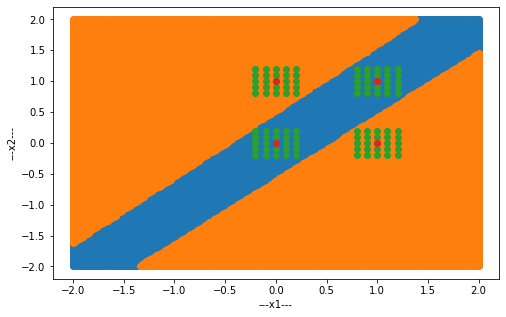

In [12]:
#plotting de
p = np.linspace(-2,2,200)
px,py=[],[]
nx,ny=[],[]

for i in p:
    for j in p:
        y3,y4,y5 = outputs([i,j],w_new,t_new)
        
        if np.round(y5):
            px.append(i)
            py.append(j)
        else:
            nx.append(i)
            ny.append(j)

f = plt.figure()
f.set_figwidth(8) 
f.set_figheight(5)

plt.plot()
plt.xlabel("---x1---")
plt.ylabel("---x2---")
plt.scatter(px,py)
plt.scatter(nx,ny)
plt.scatter(x_test[:,0],x_test[:,1])
plt.scatter(x_train[:,0],x_train[:,1])
plt.show()

#orange = 0 , means where output is zero
#blue   = 1 , means where output is one
#green  is our testing data

# Result :
Accuracy 100 % after epochs greater than 12000.


## Analysis :
<ul>
    <li>$\alpha$ ,i.e learning rate=0.1 is best.</li>
    <li>$\alpha$ less than 0.1 results in increase in loss.</li>
    <li>$\alpha$ greater than 0.1, training completes to fast</li>
    <li>Loss decreases with increasing epochs(can be seen from plot).</li>
    <li>Accuracy increases with increasing epochs</li>
    <li>Accuracy remains nearly 50% for epochs less than 8000, run algorithm for higher epochs</li>
    <li>Visualizing Decision boundary show non-linearly separable decision boundary</li>
    <li><b>Precaution :</b>Epochs should be greater than 10000(for $\alpha$ less than 0.1) </li>
    <li><b>Conclusion :</b>Using network of neuron we can create model for non-linearly separable data.</li>
</ul>